In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('/Users/kevinrodsa/Desktop/Python/Employee.csv')

In [3]:
# Check for missing values
print("Initial Dataset shape:", data.shape)
data = data.dropna()  # Drop rows with missing values
print("Dataset shape after dropping missing values:", data.shape)

Initial Dataset shape: (4653, 9)
Dataset shape after dropping missing values: (4653, 9)


In [4]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data = data.drop_duplicates()  # Remove duplicate rows
print("Dataset shape after removing duplicates:", data.shape)

Number of duplicate rows: 1889
Dataset shape after removing duplicates: (2764, 9)


In [5]:
# View data
print(data.describe())
print(data.info())

       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  2764.000000  2764.000000  2764.000000                2764.000000   
mean   2015.090449     2.636035    30.952967                   2.644356   
std       1.885943     0.624001     5.108872                   1.610610   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     2.000000    27.000000                   1.000000   
50%    2015.000000     3.000000    30.000000                   2.000000   
75%    2017.000000     3.000000    35.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  2764.000000  
mean      0.393632  
std       0.488643  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  
<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     No

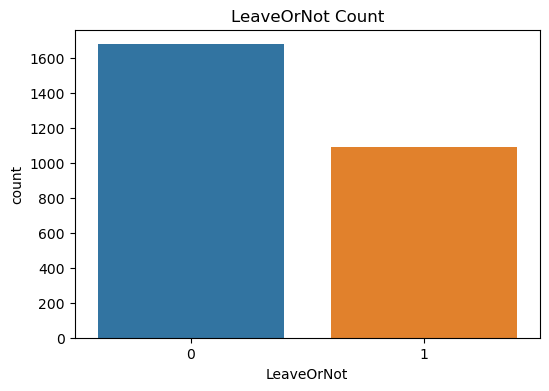

In [6]:
# Visualize the distribution of the target variable (LeaveOrNot = Attrition)
plt.figure(figsize=(6, 4))
sns.countplot(x='LeaveOrNot', data=data)
plt.title('LeaveOrNot Count')
plt.show()

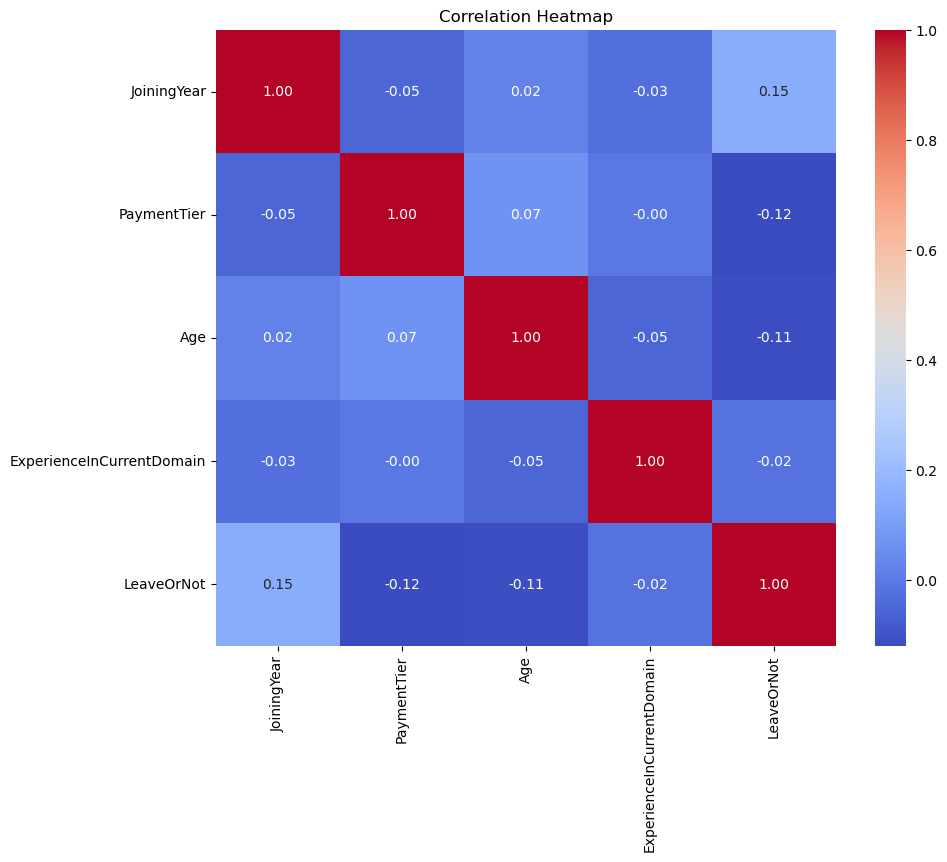

In [7]:
# Correlation heatmap (use only numeric columns)
numeric_data = data.select_dtypes(include=['int64', 'float64'])  # Select numeric columns
plt.figure(figsize=(10, 8))
corr_matrix = numeric_data.corr()  # Compute correlation matrix for numeric data
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [9]:
# Feature selection and target variable
X = data.drop('LeaveOrNot', axis=1)  # Updated to use 'LeaveOrNot' as the target variable
y = data['LeaveOrNot']

In [10]:
# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
# Build a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[286  49]
 [ 90 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       335
           1       0.72      0.59      0.65       218

    accuracy                           0.75       553
   macro avg       0.74      0.72      0.73       553
weighted avg       0.75      0.75      0.74       553

Accuracy Score: 0.7486437613019892


In [15]:
# Feature importance
feature_importances = model.feature_importances_
feature_names = data.drop('LeaveOrNot', axis=1).columns

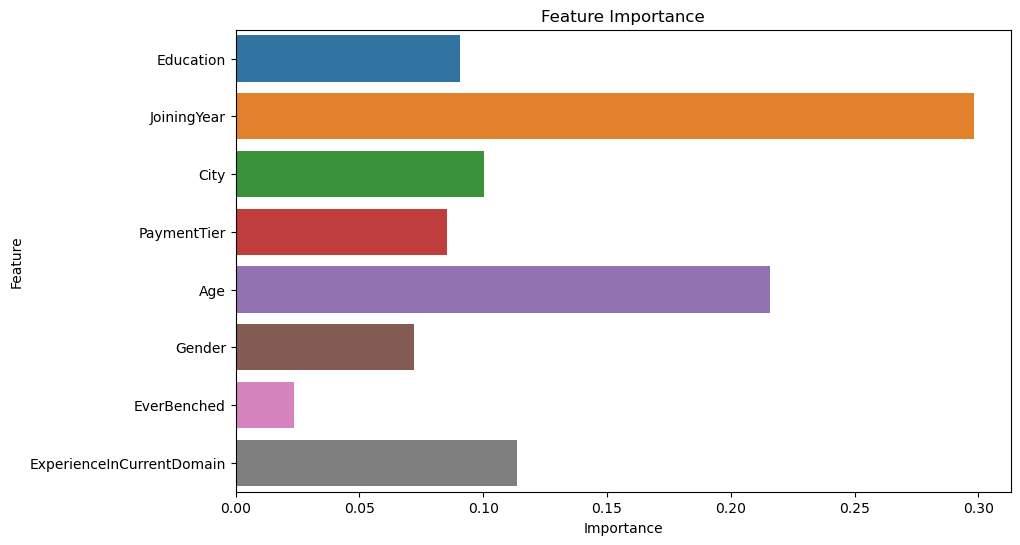

In [16]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

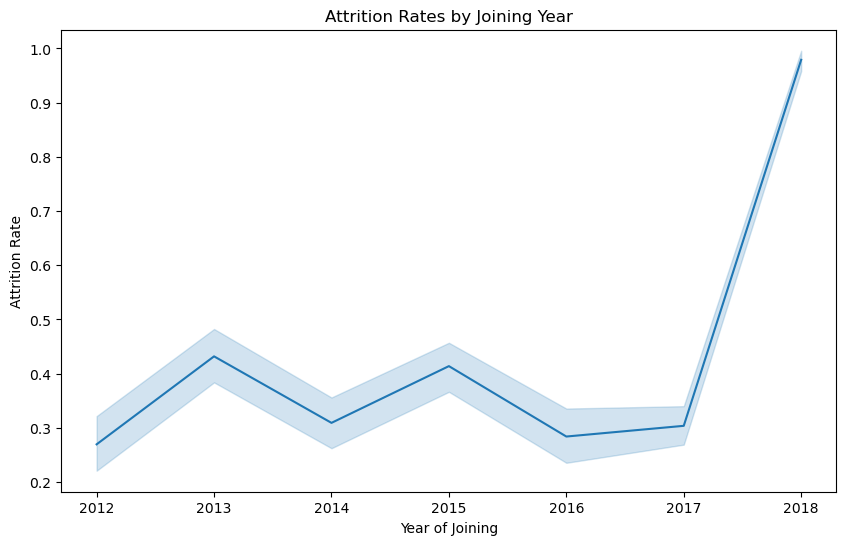

In [17]:
# Visualization: Attrition by JoiningYear
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='JoiningYear', y='LeaveOrNot', estimator='mean')
plt.title('Attrition Rates by Joining Year')
plt.xlabel('Year of Joining')
plt.ylabel('Attrition Rate')
plt.show()

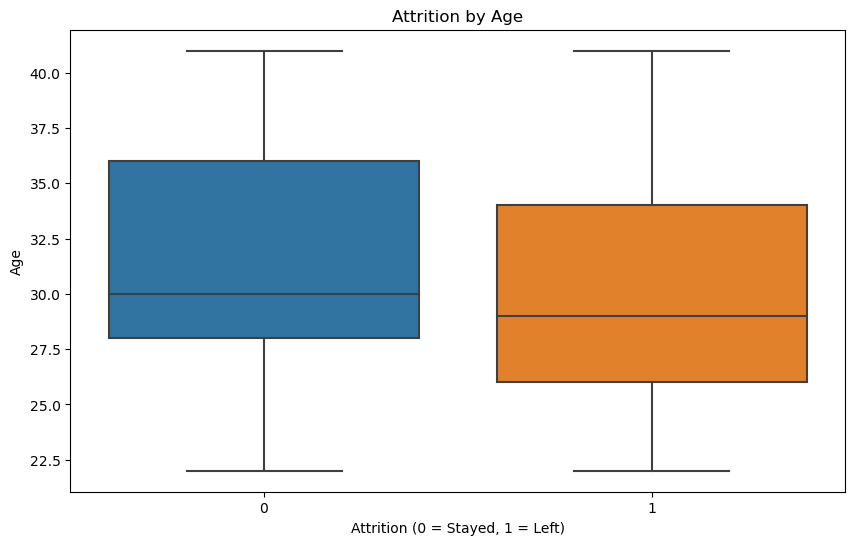

In [18]:
#Visualization: Attrition by Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='LeaveOrNot', y='Age', data=data)
plt.title('Attrition by Age')
plt.xlabel('Attrition (0 = Stayed, 1 = Left)')
plt.ylabel('Age')
plt.show()

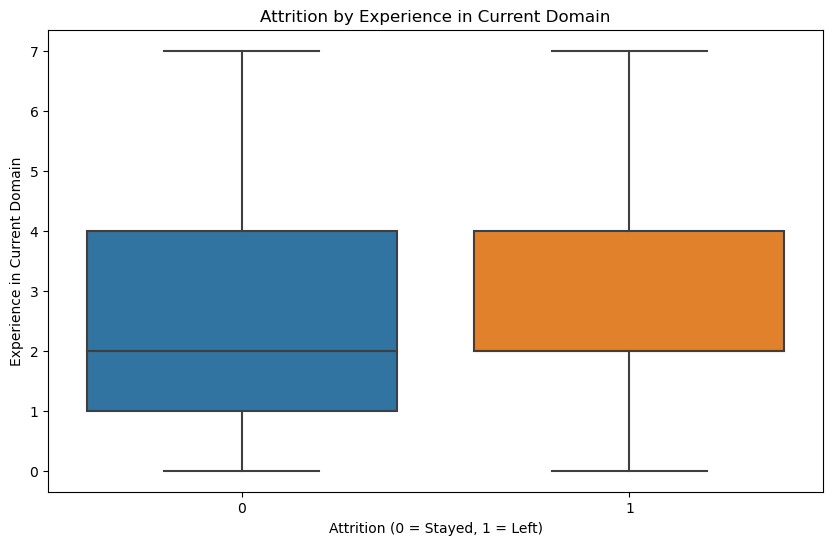

In [19]:
# Visualization: Attrition by ExperienceInCurrentDomain
plt.figure(figsize=(10, 6))
sns.boxplot(x='LeaveOrNot', y='ExperienceInCurrentDomain', data=data)
plt.title('Attrition by Experience in Current Domain')
plt.xlabel('Attrition (0 = Stayed, 1 = Left)')
plt.ylabel('Experience in Current Domain')
plt.show()

In [20]:
# Predict yearly attrition using regression
data['Year'] = data['JoiningYear']  # Ensure 'JoiningYear' exists in the dataset
yearly_attrition = data.groupby('Year')['LeaveOrNot'].sum().reset_index()


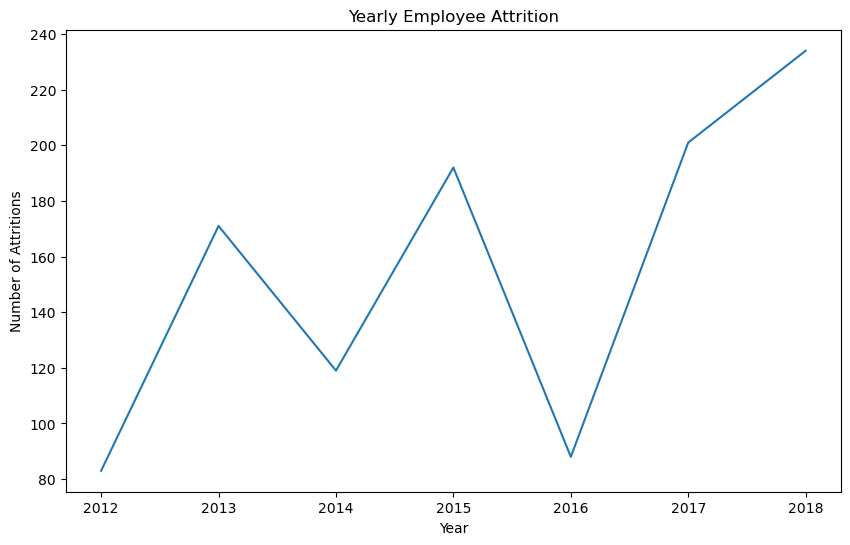

In [21]:
# Visualize yearly attrition trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='LeaveOrNot', data=yearly_attrition)
plt.title('Yearly Employee Attrition')
plt.xlabel('Year')
plt.ylabel('Number of Attritions')
plt.show()

In [22]:
# Prepare features and target for regression
X_reg = yearly_attrition[['Year']]
y_reg = yearly_attrition['LeaveOrNot']

In [23]:
# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [24]:
# Train linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [25]:
# Predict attrition for 2019, 2020, and 2021
future_years = pd.DataFrame({'Year': [2019, 2020, 2021]})
predictions = reg_model.predict(future_years)

In [56]:
print(f'Predicted attrition for 2019: {predictions[0]:.0f}')
print(f'Predicted attrition for 2020: {predictions[1]:.0f}')
print(f'Predicted attrition for 2021: {predictions[2]:.0f}')

Predicted attrition for 2019: 239
Predicted attrition for 2020: 262
Predicted attrition for 2021: 286


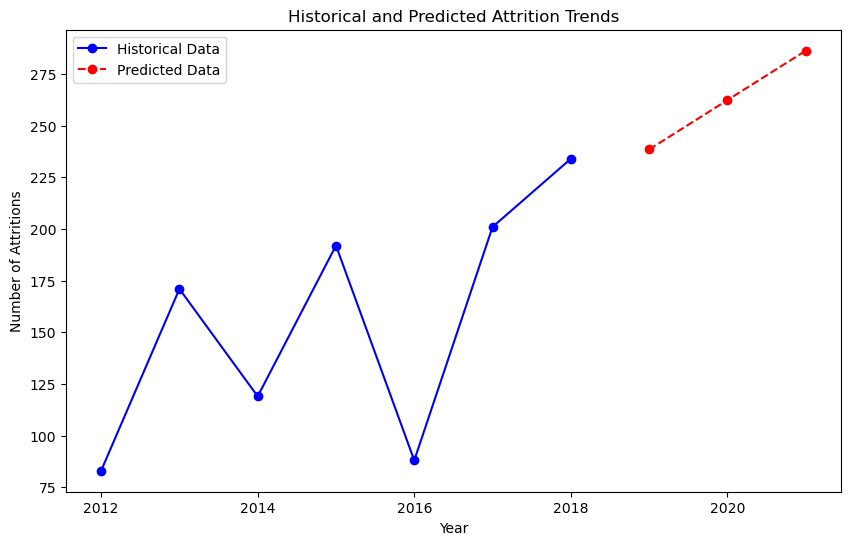

In [58]:
# Visualize predicted attrition trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_attrition['Year'], yearly_attrition['LeaveOrNot'], marker='o', label='Historical Data', color='b')
plt.plot(future_years['Year'], predictions, marker='o', linestyle='--', color='r', label='Predicted Data')
plt.title('Historical and Predicted Attrition Trends')
plt.xlabel('Year')
plt.ylabel('Number of Attritions')
plt.legend()
plt.show()